Zárthelyi dolgozat

    Másold le a dokumentumot a megszokott módon és nevezd át, úgy, hogy az tartalmazza a nevedet és a Neptun-kódodat (Vezetknév_Keresztnév-NEPTUNKÓD)!
    Miután átnevezted, oszd meg a dokumentumot velünk szerkesztési joggal! (az email-címeinket a táblán találod)

    Kérünk benneteket, hogy ahol csak lehetséges, legjobb tudomásotok szerint kommentezzétek fel a kódot, illetve válaszoljatok szövegesen is.
    A hangsúly azon van, ahogyan előállítjátok a kért adatokat, nem azok pontosságán, így ha valahol hibás predikációt ad a modell nem gond, (de lehetőség szerint ismerjétek fel, és írjátok oda, hogy mi lenne az elvárt viselkedés szerintetek).
    Ezen felül, ha előre láthatóan ki fogtok futni az időből, akkor lehetőség szerint írjátok le szövegesen, mit csináltatok volna a maradék feladatokkal!

    A zárthelyi megírásához használhattok bármilyen segédanyagot, kivéve egymást. Se online, se offline!

Sok Sikert Kívánunk!

1. feladat

Az https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data adatbázis kagylók jellemzőit és életkorát tartalmazza. Hajts végre regressziós gépi tanulási kísérletet arra nézve, hogy az életkor mennyire jól állapítható meg képek a jellemzők alapján!

    Az abalone.data fájl utolsó oszlopa tartalmazza az életkort.
    Használd az egyedek véletlenszerű 30%-át kiértékelő adatbázisnak.
    A k-legközelebbi-szomszéd módszert használd!
    Az abalone.names fájl információkat tartalmaz az adatbázisró, például a jellemzők neveit is.


In [37]:
import pandas as pd
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=columns)
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# 'Sex' kategória numerikus kódolása
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Először kiszámoljuk az 'Age' oszlopot, majd eltávolítjuk a 'Rings' oszlopot...
# ...de a biztonság kedvéért ránézünk az oszlopokra mindenek előtt
print(df.columns)
# Célváltozó átalakítása (Rings + 1.5 -> kor becslése)
df['Age'] = df['Rings'] + 1.5
df.drop(columns=['Rings'], inplace=True)

# Adatok elválasztása bemeneti jellemzőkre és célváltozóra
X = df.drop(columns=['Age'])
y = df['Age']

# Adatfelosztás tanuló és teszt halmazra (70-30% arányban)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Adatfelosztás tanuló és teszt és kiértékelő halmazra - a paramétereket kiértékelő halmazra keresem, NEM teszt halmazra, valami ilyesmi, ez nem pontos
# X_train, X_test, target_val, target_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN regresszor modell inicializálása és tanítása
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Előrejelzés a teszthalmazon
y_pred = knn.predict(X_test)

# Kiértékelési metrikák
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Eredmények kiíratása
print(f"RMSE (Gyökösített átlagos négyzetes hiba): {rmse:.2f}")
print(f"R^2 (Determinációs együttható): {r2:.2f}")

Index(['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')
RMSE (Gyökösített átlagos négyzetes hiba): 2.21
R^2 (Determinációs együttható): 0.52


Az RMSE azt mutatja, hogy átlagosan mekkora az eltérés az előrejelzések és a valós értékek között ugyanabban a mértékegységben, mint a célváltozó. Minél kisebb az RMSE, annál jobb a modell teljesítménye.

Az R2^2 azt jelzi, hogy az előrejelzések milyen arányban magyarázzák az adatban lévő varianciát. Egy R^2=0.8 azt jelenti, hogy a modell az adatváltozatosság 80%-át lefedi.

Egy jó modell általában kis RMSE-t és magas R2^2-t produkál.

2/A.:

Hangold be a k-legközelebbi-szomszéd meta-paraméterét. (bónus feladat: a meta-paraméter értékekre a túltanási ábra kirajzolása)

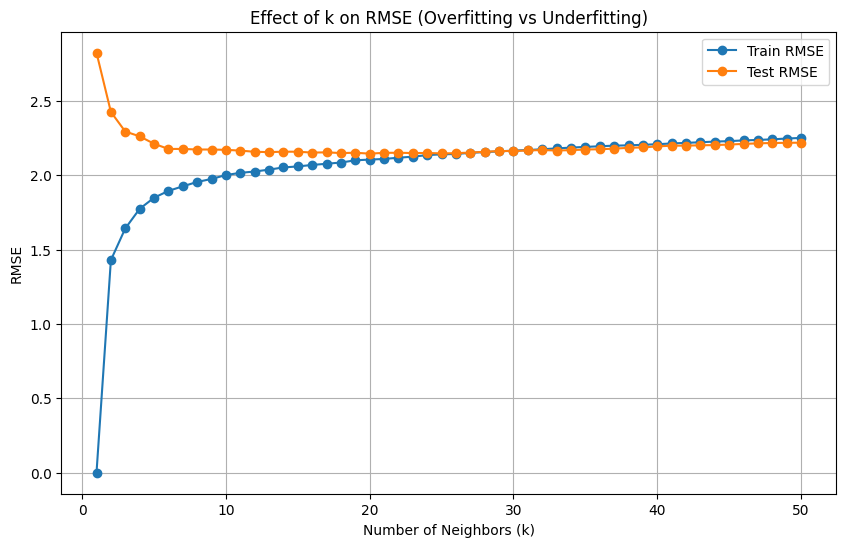

Optimal K: 20


In [39]:
import matplotlib.pyplot as plt

# Meta-paraméter hangolás: K értékek tesztelése
k_values = range(1, 51)  # K értékek 1-től 50-ig
train_rmse = []
test_rmse = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # RMSE számítás tanuló és teszthalmazra
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

# Ábrázolás: K értékek hatása a teljesítményre
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_rmse, label="Train RMSE", marker='o')
plt.plot(k_values, test_rmse, label="Test RMSE", marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("Effect of k on RMSE (Overfitting vs Underfitting)")
plt.legend()
plt.grid()
plt.show()

# Legjobb K érték kiíratása
optimal_k = k_values[np.argmin(test_rmse)]
print(f"Optimal K: {optimal_k}")


2/B. feladat

Tesztelj egy lineáris gépet is ugyanerre a feladatra!

A végén szövegként írd le, hogy a k-legközelebbi-szomszéd és a lineáris gékét algoritmus/megközelítés közül melyiket tekinted jobbnak!

In [40]:
from sklearn.linear_model import LinearRegression

# Lineáris regresszió modell inicializálása és tanítása
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Előrejelzés a teszthalmazon
y_pred_linear = linear_model.predict(X_test)

# Kiértékelési metrikák lineáris modellre
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Eredmények kiíratása
print(f"Lineáris modell - RMSE: {rmse_linear:.2f}")
print(f"Lineáris modell - R^2: {r2_linear:.2f}")


Lineáris modell - RMSE: 2.20
Lineáris modell - R^2: 0.52


A lineáris gépes megközelítést tekintem jobbnak mert blablabla...

3. feladat

Melyik jellemző a leghasznosabb a tanult lineáris gépben?

Építs erre az egy jellemzőre egy szabályalapú baselinet és hasonlítsd a konstans baselinehoz!

In [45]:
# 3. feladat: Leghasznosabb jellemző a lineáris modellben
coefficients = pd.Series(linear_model.coef_, index=X.columns)
most_important_feature = coefficients.abs().idxmax()
print(f"A leghasznosabb jellemző a lineáris modellben: {most_important_feature}")

# Szabályalapú baseline az egyik jellemzőre
X_rule_based = X_test[[most_important_feature]]
y_rule_based_pred = np.mean(y_train[X_train[most_important_feature] == X_rule_based.iloc[0][most_important_feature]])
y_pred_rule_based = np.array([y_rule_based_pred] * len(X_test))

rmse_rule_based = np.sqrt(mean_squared_error(y_test, y_pred_rule_based))
print(f"Szabályalapú baseline RMSE: {rmse_rule_based:.2f}")

# Konstans baseline (átlagos életkor a tanulóhalmazon)
y_const_pred = np.mean(y_train)
y_pred_const = np.full(len(y_test), y_const_pred)
rmse_const = np.sqrt(mean_squared_error(y_test, y_pred_const))
print(f"Konstans baseline RMSE: {rmse_const:.2f}")

A leghasznosabb jellemző a lineáris modellben: ShuckedWeight
Szabályalapú baseline RMSE: 3.40
Konstans baseline RMSE: 3.19


4. feladat

A folytanos jellemzők alapján csinálj egy 2D leképezést és ebben a térben jelenítsd meg az egyedeket. Az egyedekhez tartozó jelek színe legyen az életkor (tipp: használhatod a cmap='Spectral' argumentumot a plothoz)

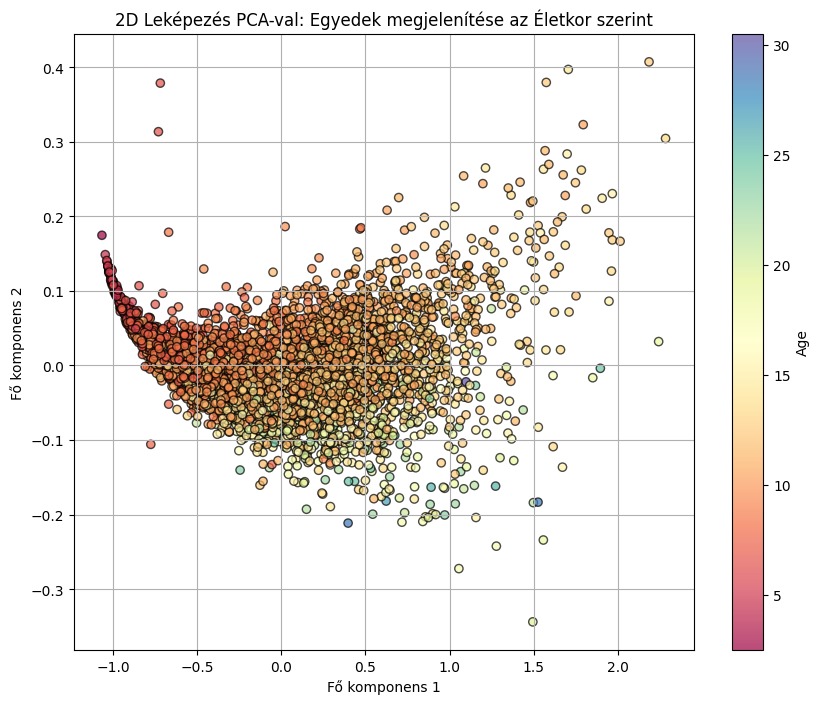

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Csak a folyamatos jellemzőket használjuk (az 'Sex' nélkül)
continuous_features = ['Length', 'Diameter', 'Height', 'WholeWeight',
                       'ShuckedWeight', 'VisceraWeight', 'ShellWeight']
X_continuous = X[continuous_features]

# PCA alkalmazása
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_continuous)

# 2D ábrázolás az életkor színskálával
plt.figure(figsize=(10, 8))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', edgecolor='k', alpha=0.7)
plt.colorbar(sc, label="Age")
plt.title("2D Leképezés PCA-val: Egyedek megjelenítése az Életkor szerint")
plt.xlabel("Fő komponens 1")
plt.ylabel("Fő komponens 2")
plt.grid()
plt.show()
